In [1]:
import os
import json

import numpy as np 

import matplotlib as mpl
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'grid'])
mpl.rcParams["font.size"] = "16"

In [2]:
with open('./data/evaluation.json', 'r') as f:
    results = json.loads(f.read())
    
models = results.keys()

In [3]:
models

dict_keys(['none_1', 'none_5', 'cm_1', 'cm_5', 'spe_1', 'spe_5', 'lpe_1', 'lpe_5', 'spe_cm_1', 'spe_cm_5', 'lpe_cm_1', 'lpe_cm_5'])

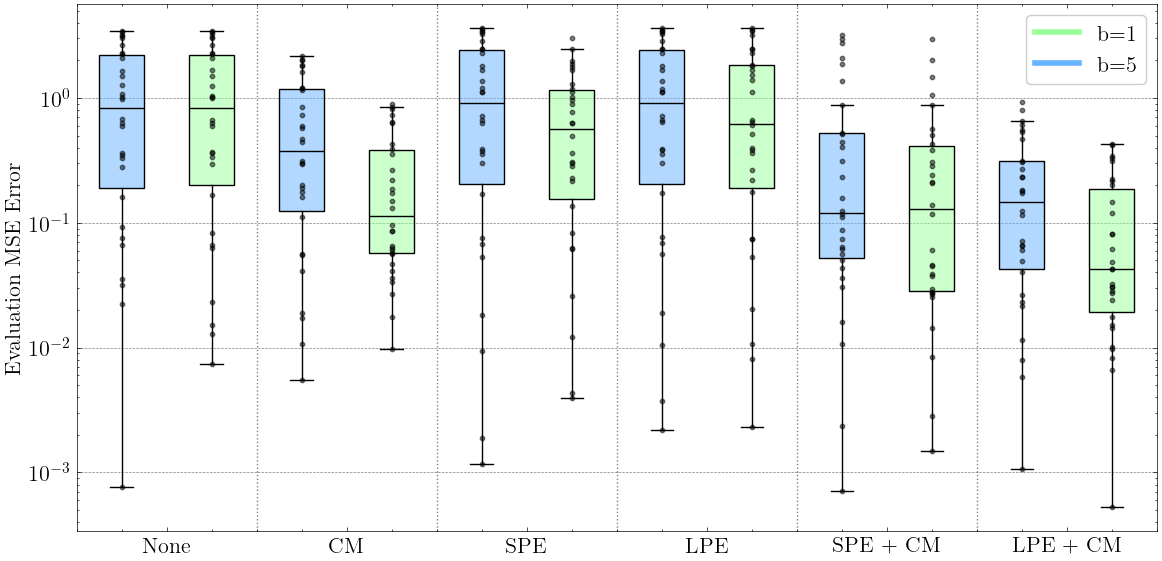

In [4]:
# Prepare data for boxplot
boxplot_data = []
labels = []

models = ['none', 'cm', 'spe', 'lpe', 'spe_cm', 'lpe_cm'][::-1]
bs = [1, 5][::-1]

for model in models:
    for b in bs:
        key = f"{model}_{b}"
        boxplot_data.append(results[key])
        labels.append(key)
boxplot_data = boxplot_data[::-1]

# Create the boxplot
plt.figure(figsize=(12, 6))
box = plt.boxplot(boxplot_data, patch_artist=True, notch=False, vert=True, zorder=1, showfliers=False)

# Define colors for the boxplots
colors = ['#99FF99', '#66B3FF'][::-1]
for i, patch in enumerate(box['boxes']):
    model_index = i // len(bs)  # Determine the model index
    # patch.set_alpha(0.5)
    patch.set_edgecolor('black')
    patch.set_facecolor(colors[i % len(colors)])  # Set color based on hyperparameter
    
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0.5))
    
    data = boxplot_data[i]
    y = np.random.normal(i + 1, 0.0, size=len(data))
    plt.scatter(y, data, alpha = 0.5, color = 'black', s = 10, zorder = 2)
    
for median in box['medians']:
    median.set_color('black')

# Adding legend
handles = [plt.Line2D([0], [0], color=colors[i], lw=4) for i in range(len(bs))][::-1]
labels_legend = [f'b={b}' for b in [1, 5, 10, 15]]
plt.legend(handles, labels_legend, loc='upper right', ncol=1)

# Set x-ticks and labels
plt.xticks(
    [1.5 + 2 * i for i in range(0, len(models))], 
    ['None', 'CM', 'SPE', 'LPE', 'SPE + CM', 'LPE + CM'], rotation = 0)
plt.ylabel('Evaluation MSE Error')
plt.grid(False, axis='x')

plt.axvline(2.5, 0, alpha = 0.5, color = 'black', linestyle = ':')
plt.axvline(4.5, 0, alpha = 0.5, color = 'black', linestyle = ':')
plt.axvline(6.5, 0, alpha = 0.5, color = 'black', linestyle = ':')
plt.axvline(8.5, 0, alpha = 0.5, color = 'black', linestyle = ':')
plt.axvline(10.5, 0, alpha = 0.5, color = 'black', linestyle = ':')

plt.yscale('log')

# Show the plot
plt.tight_layout()
plt.savefig('./performance 1.svg')
plt.show()

In [6]:
def load_data(run_name):
    with open(f'./data/{run_name}.json', 'r') as file:
        result = json.loads(file.read())
    return result

def get_plotting_data(key, *names):
    result = []
    for name in names:
        result.append(load_data(name)[key])
    result = np.array(result)
    
    mean = result.mean(axis=0)
    var = result.std(axis=0)
    
    return mean, var

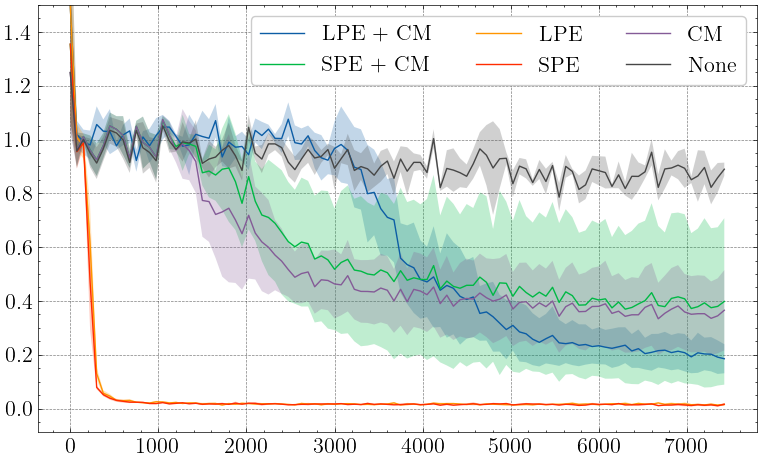

In [8]:
fig = plt.figure(figsize=(8, 5))

x = np.arange(0, 7500, 75)

groups = []
for model in models:
    group = []
    for b in [1, 5]:
        for seed in [42, 451, 1984]:
            group.append(f'{model}_{b}_{seed}')
    groups.append(group)

for group, model in zip(groups, ['None', 'CM', 'SPE', 'LPE', 'SPE + CM', 'LPE + CM'][::-1]):
    mean, var = get_plotting_data('loss', *group)
    mean = mean[::75]
    var = var[::75]
    plt.plot(x, mean, label = model)
    plt.fill_between(x, mean + var, mean - var, alpha = 0.25, linewidth = 0)

plt.legend(ncols = 3)
plt.ylim(top = 1.5)
plt.tight_layout()
plt.savefig('./loss comparison.svg')
plt.show()